In [138]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.full((grid_size, grid_size), 3, dtype=int)
        self.t = 0
        self.pl_data = []
        self.slope = []
    def get_total_slope(self):
        return np.sum(np.full((self.grid_size, self.grid_size), 4, dtype=int) - self.grid)

        
    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()

    def find_high_piles(self):
        x, y = np.where(self.grid > 4)
        return list(zip(x, y))

        
    def topple(self):
        unstable = True
        num_affected_squares = 0
        #self.slope.append(self.get_total_slope())
        while unstable:
            high_piles_coords = self.find_high_piles()
            num_affected_squares += len(high_piles_coords)
            for x, y in high_piles_coords:
                self.grid[x, y] -= 4
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
                self.t += 1
                
        self.pl_data.append(num_affected_squares)

    
    def get_grid(self):
        return self.grid
    
    def three_d_histogram(self, save = True, dir_name = "3d", image_name = "hist_3d.png"):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            xpos, ypos = np.meshgrid(np.arange(self.grid_size), np.arange(self.grid_size))
            xpos = xpos.flatten()
            ypos = ypos.flatten()
            zpos = np.zeros_like(xpos)
            dx = dy = 1
            dz = self.grid.flatten()
            ax.set_zlim(0, 10)
            ax.bar3d(xpos, ypos, zpos, dx, dy, dz, cmap='viridis')
            plt.title('Sandpile Model Histogram')
            if save == True:
                plt.savefig(os.path.join(dir_name, image_name))
                plt.close()  # Close the plot to avoid memory issues
            else:
                plt.show()    

In [112]:
def run_simulations(grid_size, num_grains, num_simulations):
    all_pl_data = []

    for _ in tqdm(range(num_simulations), desc="Running simulations"):
        sandpile = Sandpile(grid_size)
        coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))

        for coord in coordinates:
            sandpile.add_sand(coord[0], coord[1])

        all_pl_data.append(sandpile.pl_data)

    return all_pl_data


def average_data(d):
    d = np.swapaxes(d, 1, 0)
    average = d.mean(axis=1)
    std_dev = d.std(axis=1)  # Calculate the standard deviation along the same axis
    return average, std_dev

In [114]:
# Example usage
grid_size = 30
num_grains = 50000
num_simulations = 1
dir_name = "3d"
os.makedirs(dir_name, exist_ok=True)

# Run multiple simulations and gather data
all_simulation_data = run_simulations(grid_size, num_grains, num_simulations)



Running simulations: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


In [115]:
average, std_dev = average_data(all_simulation_data)

/tmp/ipykernel_47874/3259620922.py:10: RuntimeWarning: divide by zero encountered in log
  plt.errorbar(np.log(np.arange(0, len(sorted_data))), np.log(sorted_data),  fmt='o', capsize=5, markersize=3)


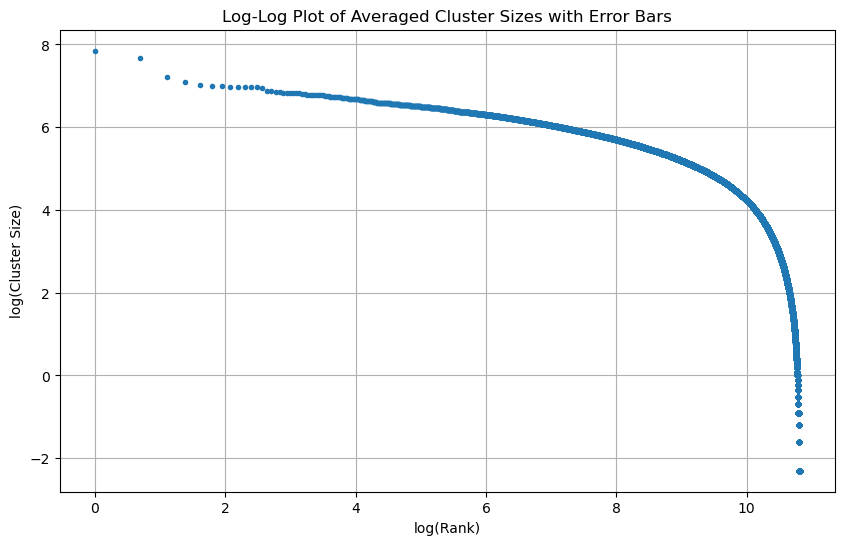

In [108]:
# Sort the data and standard deviation
sorted_indices = np.argsort(average)[::-1]

sorted_data = average[sorted_indices]
sorted_std_dev = std_dev[sorted_indices]

# Log-transform the data

# Plot the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.log(np.arange(0, len(sorted_data))), np.log(sorted_data),  fmt='o', capsize=5, markersize=3)
plt.xlabel('log(Rank)')
plt.ylabel('log(Cluster Size)')
plt.title('Log-Log Plot of Averaged Cluster Sizes with Error Bars')
plt.grid(True)
plt.show()

In [132]:
grid_size = 30
num_grains = 10000

sandpile = Sandpile(grid_size)
coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
#coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in coordinates:
    sandpile.add_sand(coord[0], coord[1])



0
725
0


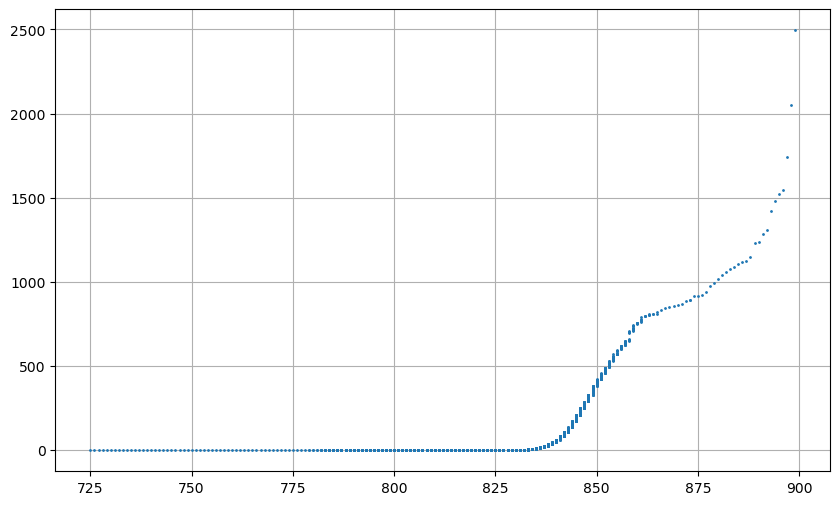

In [134]:
# Sort the data and standard deviation
sorted_pl = sorted(sandpile.pl_data)
sorted_slopes = sorted(sandpile.slope)
print(len(sorted_slopes) - len(sorted_pl))
# Log-transform the data
print(sorted_slopes[0])
print(sorted_pl[0])
# Plot the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(sorted_slopes, sorted_pl, fmt='o', capsize=5, markersize=1)
plt.grid(True)
plt.show()

In [140]:
grid_size = 100
num_grains = 10000

sandpile = Sandpile(grid_size)
#coordinates = np.random.randint(grid_size//2, grid_size//2, size=(num_grains, 2))
coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in coordinates:
    sandpile.add_sand(coord[0], coord[1])


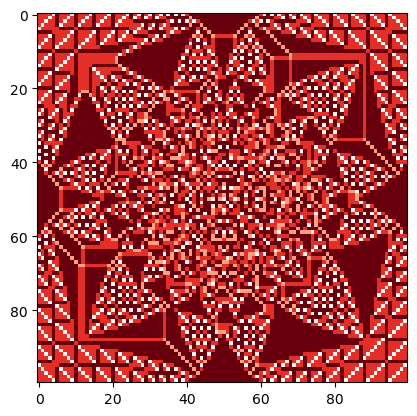

In [144]:
plt.imshow(sandpile.grid, cmap="Reds")